In [6]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

# Add the project directory to sys.path
project_dir = Path.cwd().parent  # Adjust as needed to point to your project root
sys.path.append(str(project_dir))
from utils.pipeline import Pipeline, EvaluationEnum
dataloader = Pipeline(evaluation=EvaluationEnum.OUTLIERS)


data, target = dataloader.get_security_classification_dataset_and_target()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
data

,PD_CD,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,CLASS__security,YEAR,MONTH,DAY_OF_WEEK,IS_WEEKEND,DAY_OF_YEAR_sin,DAY_OF_YEAR_cos
0,779.0,126.0,0,0,1,0,62,0.0,2,1,0.0,40.598595,-73.988298,1,2017,8,1,0,-0.493,-0.870
1,750.0,359.0,1,1,0,1,25,4.0,2,1,1.0,40.787875,-73.928182,0,2014,12,1,0,-0.271,0.963
2,639.0,361.0,2,2,0,1,30,0.0,1,1,2.0,40.828675,-73.943990,1,2015,3,3,0,0.973,0.230
3,969.0,881.0,3,3,0,1,28,0.0,2,1,1.0,40.805768,-73.944782,1,2009,4,2,0,0.891,-0.455
4,567.0,235.0,4,4,0,2,120,0.0,2,1,0.0,40.621368,-74.143557,1,2010,2,3,0,0.745,0.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,205.0,352.0,9,14,0,3,43,0.0,1,1,1.0,40.837554,-73.866825,1,2006,12,2,0,-0.320,0.947
5096,101.0,344.0,8,13,0,3,41,0.0,2,0,1.0,40.819099,-73.890046,1,2009,8,2,0,-0.647,-0.762
5097,397.0,105.0,14,244,1,0,63,0.0,2,1,1.0,40.628516,-73.941384,1,2014,11,2,0,-0.757,0.654
5098,511.0,235.0,4,7,0,4,104,0.0,2,1,0.0,40.711070,-73.900566,1,2011,4,4,0,0.891,-0.455


## Standard Scaler

In [8]:
from pandas import read_csv, DataFrame, Series
from sklearn.preprocessing import StandardScaler

vars: list[str] = data.columns.to_list()
target_data: Series = data.pop(target)

transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(
    data
)
df_zscore = DataFrame(transf.transform(data), index=data.index)
df_zscore[target] = target_data
df_zscore.columns = vars

## MinMax Scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(data)
df_minmax = DataFrame(transf.transform(data), index=data.index)
df_minmax[target] = target_data
df_minmax.columns = vars

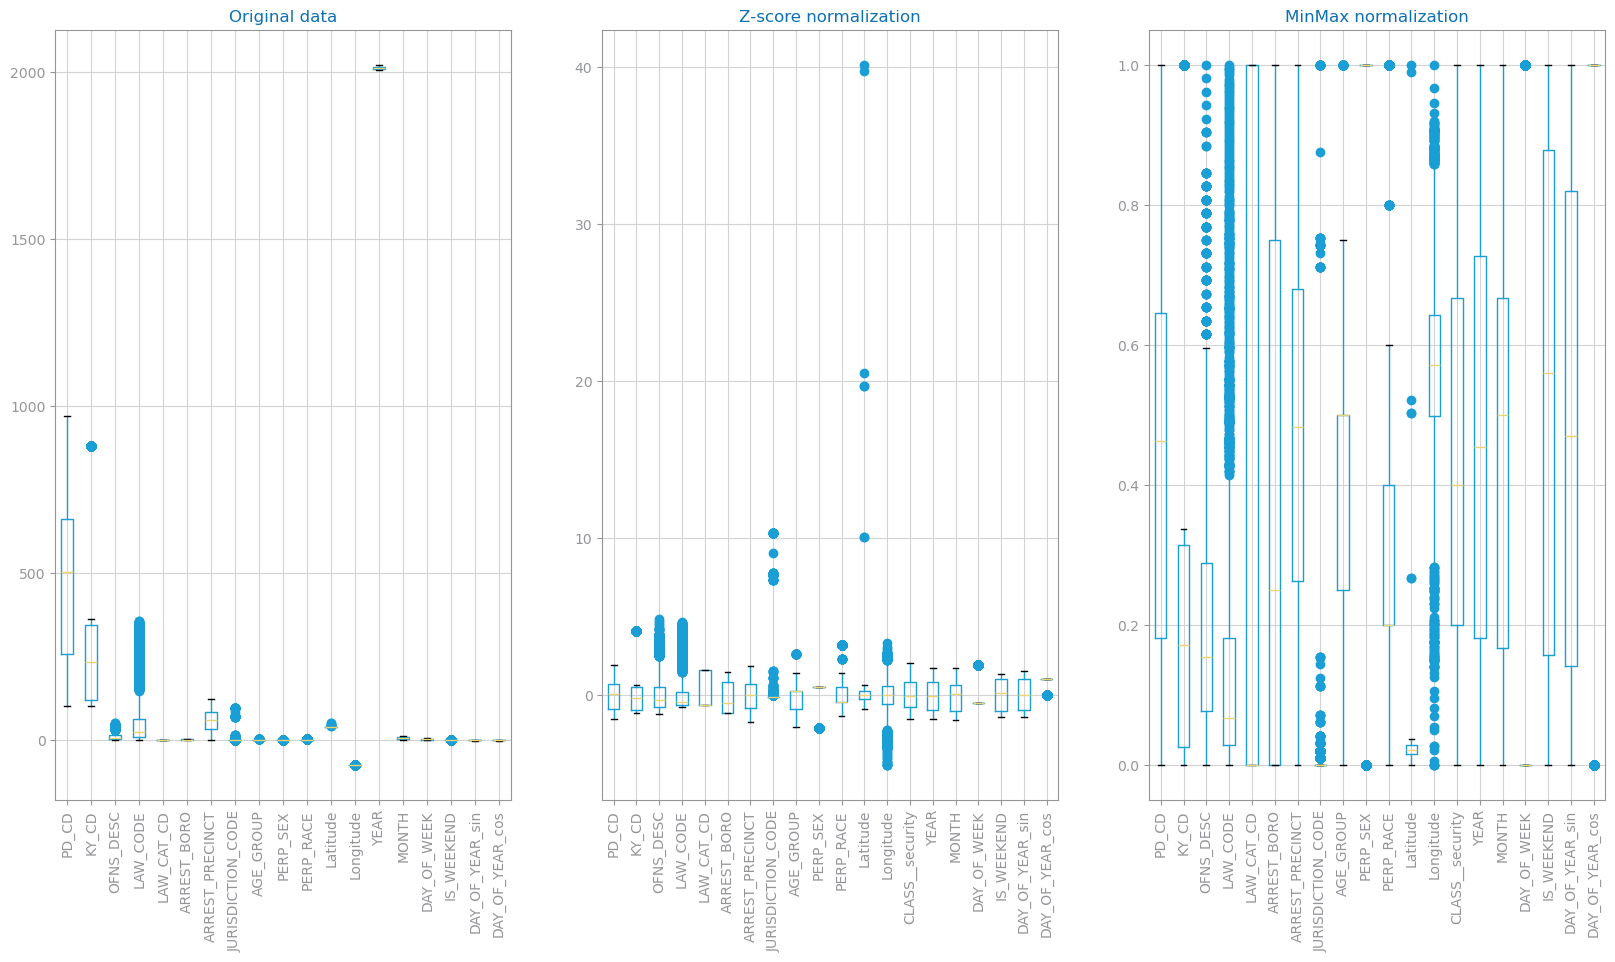

In [10]:
from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 0].set_title("Original data")
data.boxplot(ax=axs[0, 0])
axs[0, 1].set_title("Z-score normalization")
df_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
df_minmax.boxplot(ax=axs[0, 2])
for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
show()

# save image
IMAGE_FOLDER = "images_scaling"
Path(IMAGE_FOLDER).mkdir(exist_ok=True)
path = f"{IMAGE_FOLDER}/scaling_security.png"
if not Path(path).exists():
    fig.savefig(path)

## Conclusion
We tested MinMax and Z-score scaling. StandardScaler chosen due to outlier handling and stable distribution. This approach improves model performance. All features now standardized.